In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import ast
import numpy as np
import re
from nltk.corpus import stopwords
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
import seaborn as sns

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df_TN = pd.read_csv('/content/merged_tn.csv', on_bad_lines='skip')

In [ ]:
df_TN.head()

,rest_bid,rest_name,rest_city,rest_address,zipcode,rest_stars,rest_review_count,review_text
0,19081,China King,Nashville,6601 Sugar Valley Dr,37211,4.0,39,This is our go to Chinese place. Food is alwa...
1,19081,China King,Nashville,6601 Sugar Valley Dr,37211,4.0,39,This is our go to Chinese place. Food is alwa...
2,19081,China King,Nashville,6601 Sugar Valley Dr,37211,4.0,39,This is our go to Chinese place. Food is alwa...
3,19081,China King,Nashville,6601 Sugar Valley Dr,37211,4.0,39,This is our go to Chinese place. Food is alwa...
4,19081,China King,Nashville,6601 Sugar Valley Dr,37211,4.0,39,This is our go to Chinese place. Food is alwa...


In [ ]:
# Define keywords related to tourism
keywords = [
    "tourism", "tourist", "first time", "hotel", "rental", "visit", "travel",
    "vacation", "trip", "destination", "stay", "accommodation", "guest", "booking",
    "music city", "Opry"
]

# Create a function to filter reviews
def filter_reviews(text):
    # Check if any keyword exists in the review text
    return any(re.search(rf'\b{keyword}\b', text, re.IGNORECASE) for keyword in keywords)

# Apply the function to the review_text column
df_TN['is_tourism_related'] = df_TN['review_text'].apply(filter_reviews)

# Filter the dataset to include only tourism-related reviews
filtered_df = df_TN[df_TN['is_tourism_related']]

# Drop the helper column if you don't need it
filtered_df = filtered_df.drop(columns=['is_tourism_related'])

print(filtered_df)

         rest_bid                 rest_name  rest_city           rest_address  \
1003        22629  Cook Out - Gallatin Pike  Nashville     2910 Gallatin Pike   
1004        22629  Cook Out - Gallatin Pike  Nashville     2910 Gallatin Pike   
1005        22629  Cook Out - Gallatin Pike  Nashville     2910 Gallatin Pike   
1006        22629  Cook Out - Gallatin Pike  Nashville     2910 Gallatin Pike   
1007        22629  Cook Out - Gallatin Pike  Nashville     2910 Gallatin Pike   
...           ...                       ...        ...                    ...   
1750050    121759               Bar-B-Cutie  Nashville  5221 Nolensville Pike   
1750051    121759               Bar-B-Cutie  Nashville  5221 Nolensville Pike   
1750052    121759               Bar-B-Cutie  Nashville  5221 Nolensville Pike   
1750053    121759               Bar-B-Cutie  Nashville  5221 Nolensville Pike   
1750054    121759               Bar-B-Cutie  Nashville  5221 Nolensville Pike   

         zipcode  rest_star

In [ ]:
filtered_df.to_csv('filtered_reviews_tn.csv', index=False)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


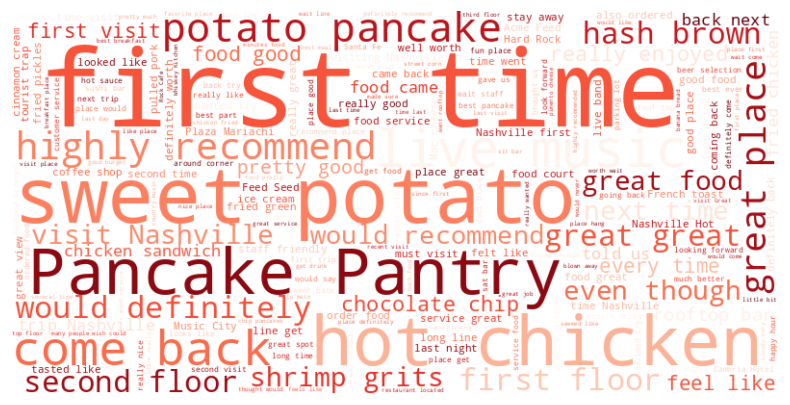

In [ ]:
# Download the stopwords dataset
nltk.download('stopwords')

# Define stop words
stop_words = set(stopwords.words('english'))
custom_stop_words = {"n", "ni", "the", "go", "give", "from", "make", "got", "one", "no", "able", "i", ".", "as"}  # Add custom irrelevant words
stop_words.update(custom_stop_words)

# Ensure all stopwords are lowercase
stop_words = {word.lower() for word in stop_words}

# Combine all reviews into a single string
combined_reviews = " ".join(filtered_df['review_text'])  # Assuming 'review_text' contains the reviews

# Remove punctuation and filter stop words
filtered_text = " ".join(
    word for word in combined_reviews.split() if word.lower() not in stop_words and word.isalnum()
)

# Generate the word cloud
wordcloud = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='Reds_r',
    stopwords=stop_words
).generate(filtered_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


#SENTIMENT SCORE

In [ ]:
tn = pd.read_csv('filtered_reviews_tn.csv')
la = pd.read_csv('/content/filtered_df_LA.csv')

In [ ]:
tn.info()
tn.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263154 entries, 0 to 263153
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rest_bid           263154 non-null  int64  
 1   rest_name          263154 non-null  object 
 2   rest_city          263154 non-null  object 
 3   rest_address       263154 non-null  object 
 4   zipcode            263154 non-null  int64  
 5   rest_stars         263154 non-null  float64
 6   rest_review_count  263154 non-null  int64  
 7   review_text        263154 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 16.1+ MB


,rest_bid,rest_name,rest_city,rest_address,zipcode,rest_stars,rest_review_count,review_text
0,22629,Cook Out - Gallatin Pike,Nashville,2910 Gallatin Pike,37216,3.0,52,"Yoooooo, if this isn't THE spot to stop for la..."
1,22629,Cook Out - Gallatin Pike,Nashville,2910 Gallatin Pike,37216,3.0,52,"Yoooooo, if this isn't THE spot to stop for la..."
2,22629,Cook Out - Gallatin Pike,Nashville,2910 Gallatin Pike,37216,3.0,52,"Yoooooo, if this isn't THE spot to stop for la..."
3,22629,Cook Out - Gallatin Pike,Nashville,2910 Gallatin Pike,37216,3.0,52,"Yoooooo, if this isn't THE spot to stop for la..."
4,22629,Cook Out - Gallatin Pike,Nashville,2910 Gallatin Pike,37216,3.0,52,"Yoooooo, if this isn't THE spot to stop for la..."


In [ ]:
tn = tn.drop_duplicates(subset = 'review_text')
tn.head()

,rest_bid,rest_name,rest_city,rest_address,zipcode,rest_stars,rest_review_count,review_text
0,22629,Cook Out - Gallatin Pike,Nashville,2910 Gallatin Pike,37216,3.0,52,"Yoooooo, if this isn't THE spot to stop for la..."
216,38029,Local Taco,Nashville,"1100 Fatherland St, Ste 104",37206,3.5,165,Local taco used to be the place....shrimp taco...
324,62946,Asihi Asian Cuisine Hibachi & Buffet,Nashville,"7648 Hwy 70 S, Ste 1",37221,3.0,89,"First Time here.. food was good, bountiful cho..."
432,19471,J & J's Market & Cafe,Nashville,1912 Broadway,37203,4.5,154,I lived in Nashville for 5 years and came here...
702,54145,Sam & Zoe's,Nashville,525 Heather Pl,37204,4.0,235,I owe Sam & Zoe's all the credit for helping m...


In [ ]:
analyzer = SentimentIntensityAnalyzer()
tn['review_score'] = tn['review_text'].apply(lambda x: analyzer.polarity_scores(x))

In [ ]:
tn.head()

,rest_bid,rest_name,rest_city,rest_address,zipcode,rest_stars,rest_review_count,review_text,review_score
0,22629,Cook Out - Gallatin Pike,Nashville,2910 Gallatin Pike,37216,3.0,52,"Yoooooo, if this isn't THE spot to stop for la...","{'neg': 0.051, 'neu': 0.798, 'pos': 0.151, 'co..."
216,38029,Local Taco,Nashville,"1100 Fatherland St, Ste 104",37206,3.5,165,Local taco used to be the place....shrimp taco...,"{'neg': 0.049, 'neu': 0.912, 'pos': 0.038, 'co..."
324,62946,Asihi Asian Cuisine Hibachi & Buffet,Nashville,"7648 Hwy 70 S, Ste 1",37221,3.0,89,"First Time here.. food was good, bountiful cho...","{'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'comp..."
432,19471,J & J's Market & Cafe,Nashville,1912 Broadway,37203,4.5,154,I lived in Nashville for 5 years and came here...,"{'neg': 0.033, 'neu': 0.653, 'pos': 0.314, 'co..."
702,54145,Sam & Zoe's,Nashville,525 Heather Pl,37204,4.0,235,I owe Sam & Zoe's all the credit for helping m...,"{'neg': 0.027, 'neu': 0.787, 'pos': 0.187, 'co..."


In [ ]:
tn['compound_score'] = tn['review_score'].apply(lambda score_dict: score_dict['compound'])
tn['positive_score'] = tn['review_score'].apply(lambda score_dict: score_dict['pos'])
tn['neutral_score'] = tn['review_score'].apply(lambda score_dict: score_dict['neu'])
tn['negative_score'] = tn['review_score'].apply(lambda score_dict: score_dict['neg'])
tn.head()

,rest_bid,rest_name,rest_city,rest_address,zipcode,rest_stars,rest_review_count,review_text,review_score,compound_score,positive_score,neutral_score,negative_score
0,22629,Cook Out - Gallatin Pike,Nashville,2910 Gallatin Pike,37216,3.0,52,"Yoooooo, if this isn't THE spot to stop for la...","{'neg': 0.051, 'neu': 0.798, 'pos': 0.151, 'co...",0.9840,0.151,0.798,0.051
216,38029,Local Taco,Nashville,"1100 Fatherland St, Ste 104",37206,3.5,165,Local taco used to be the place....shrimp taco...,"{'neg': 0.049, 'neu': 0.912, 'pos': 0.038, 'co...",-0.1280,0.038,0.912,0.049
324,62946,Asihi Asian Cuisine Hibachi & Buffet,Nashville,"7648 Hwy 70 S, Ste 1",37221,3.0,89,"First Time here.. food was good, bountiful cho...","{'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'comp...",0.7964,0.197,0.803,0.000
432,19471,J & J's Market & Cafe,Nashville,1912 Broadway,37203,4.5,154,I lived in Nashville for 5 years and came here...,"{'neg': 0.033, 'neu': 0.653, 'pos': 0.314, 'co...",0.9647,0.314,0.653,0.033
702,54145,Sam & Zoe's,Nashville,525 Heather Pl,37204,4.0,235,I owe Sam & Zoe's all the credit for helping m...,"{'neg': 0.027, 'neu': 0.787, 'pos': 0.187, 'co...",0.9772,0.187,0.787,0.027


In [ ]:
tn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2004 entries, 0 to 263100
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rest_bid           2004 non-null   int64  
 1   rest_name          2004 non-null   object 
 2   rest_city          2004 non-null   object 
 3   rest_address       2004 non-null   object 
 4   zipcode            2004 non-null   int64  
 5   rest_stars         2004 non-null   float64
 6   rest_review_count  2004 non-null   int64  
 7   review_text        2004 non-null   object 
 8   review_score       2004 non-null   object 
 9   compound_score     2004 non-null   float64
 10  positive_score     2004 non-null   float64
 11  neutral_score      2004 non-null   float64
 12  negative_score     2004 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 219.2+ KB


In [ ]:
la.info()
la.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414552 entries, 0 to 414551
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rest_bid           414552 non-null  int64  
 1   rest_name          414552 non-null  object 
 2   rest_city          414552 non-null  object 
 3   rest_address       414552 non-null  object 
 4   zipcode            414551 non-null  float64
 5   rest_latitude      414551 non-null  float64
 6   rest_longitude     414551 non-null  float64
 7   rest_stars         414551 non-null  float64
 8   rest_review_count  414551 non-null  float64
 9   review_text        414551 non-null  object 
 10  Sentiment          414551 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 34.8+ MB


,rest_bid,rest_name,rest_city,rest_address,zipcode,rest_latitude,rest_longitude,rest_stars,rest_review_count,review_text,Sentiment
0,10219,Compère Lapin,New Orleans,535 Tchoupitoulas St,70130.0,29.9479,-90.0675,4.5,804.0,Conveniently located in the French Quarter thi...,Positive
1,10219,Compère Lapin,New Orleans,535 Tchoupitoulas St,70130.0,29.9479,-90.0675,4.5,804.0,Conveniently located in the French Quarter thi...,Positive
2,10219,Compère Lapin,New Orleans,535 Tchoupitoulas St,70130.0,29.9479,-90.0675,4.5,804.0,Conveniently located in the French Quarter thi...,Positive
3,10219,Compère Lapin,New Orleans,535 Tchoupitoulas St,70130.0,29.9479,-90.0675,4.5,804.0,Conveniently located in the French Quarter thi...,Positive
4,10219,Compère Lapin,New Orleans,535 Tchoupitoulas St,70130.0,29.9479,-90.0675,4.5,804.0,Conveniently located in the French Quarter thi...,Positive


In [ ]:
la = la.drop_duplicates(subset = 'review_text')
la.head()

,rest_bid,rest_name,rest_city,rest_address,zipcode,rest_latitude,rest_longitude,rest_stars,rest_review_count,review_text,Sentiment
0,10219,Compère Lapin,New Orleans,535 Tchoupitoulas St,70130.0,29.9479,-90.0675,4.5,804.0,Conveniently located in the French Quarter thi...,Positive
56,88916,Bayona,New Orleans,430 Dauphine St,70112.0,29.9573,-90.0681,4.0,746.0,Best meal I had during my week-long stay in Ne...,Positive
90,104393,The Vintage,New Orleans,3121 Magazine St,70115.0,29.9244,-90.0861,4.5,344.0,We were hunting fabulous beignets. We found t...,Positive
154,126930,Cafe Beignet on Royal Street,New Orleans,334 Royal St,70130.0,29.9553,-90.0671,4.0,2688.0,Very cute location which we stumbled upon arou...,Negative
208,31034,Royal House,New Orleans,441 Royal St,70130.0,29.9565,-90.0664,4.0,5070.0,"Great food, great service. Our family really ...",Negative


In [ ]:
la['review_text'] = la['review_text'].astype(str)
analyzer = SentimentIntensityAnalyzer()
la['review_score'] = la['review_text'].apply(lambda x: analyzer.polarity_scores(x))
la.head()

,rest_bid,rest_name,rest_city,rest_address,zipcode,rest_latitude,rest_longitude,rest_stars,rest_review_count,review_text,Sentiment,review_score
0,10219,Compère Lapin,New Orleans,535 Tchoupitoulas St,70130.0,29.9479,-90.0675,4.5,804.0,Conveniently located in the French Quarter thi...,Positive,"{'neg': 0.022, 'neu': 0.819, 'pos': 0.16, 'com..."
56,88916,Bayona,New Orleans,430 Dauphine St,70112.0,29.9573,-90.0681,4.0,746.0,Best meal I had during my week-long stay in Ne...,Positive,"{'neg': 0.0, 'neu': 0.665, 'pos': 0.335, 'comp..."
90,104393,The Vintage,New Orleans,3121 Magazine St,70115.0,29.9244,-90.0861,4.5,344.0,We were hunting fabulous beignets. We found t...,Positive,"{'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'comp..."
154,126930,Cafe Beignet on Royal Street,New Orleans,334 Royal St,70130.0,29.9553,-90.0671,4.0,2688.0,Very cute location which we stumbled upon arou...,Negative,"{'neg': 0.019, 'neu': 0.744, 'pos': 0.237, 'co..."
208,31034,Royal House,New Orleans,441 Royal St,70130.0,29.9565,-90.0664,4.0,5070.0,"Great food, great service. Our family really ...",Negative,"{'neg': 0.0, 'neu': 0.564, 'pos': 0.436, 'comp..."


In [ ]:
la['compound_score'] = la['review_score'].apply(lambda score_dict: score_dict['compound'])
la['positive_score'] = la['review_score'].apply(lambda score_dict: score_dict['pos'])
la['neutral_score'] = la['review_score'].apply(lambda score_dict: score_dict['neu'])
la['negative_score'] = la['review_score'].apply(lambda score_dict: score_dict['neg'])
la.head()

,rest_bid,rest_name,rest_city,rest_address,zipcode,rest_latitude,rest_longitude,rest_stars,rest_review_count,review_text,Sentiment,review_score,compound_score,positive_score,neutral_score,negative_score
0,10219,Compère Lapin,New Orleans,535 Tchoupitoulas St,70130.0,29.9479,-90.0675,4.5,804.0,Conveniently located in the French Quarter thi...,Positive,"{'neg': 0.022, 'neu': 0.819, 'pos': 0.16, 'com...",0.9184,0.160,0.819,0.022
56,88916,Bayona,New Orleans,430 Dauphine St,70112.0,29.9573,-90.0681,4.0,746.0,Best meal I had during my week-long stay in Ne...,Positive,"{'neg': 0.0, 'neu': 0.665, 'pos': 0.335, 'comp...",0.9838,0.335,0.665,0.000
90,104393,The Vintage,New Orleans,3121 Magazine St,70115.0,29.9244,-90.0861,4.5,344.0,We were hunting fabulous beignets. We found t...,Positive,"{'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'comp...",0.9287,0.264,0.736,0.000
154,126930,Cafe Beignet on Royal Street,New Orleans,334 Royal St,70130.0,29.9553,-90.0671,4.0,2688.0,Very cute location which we stumbled upon arou...,Negative,"{'neg': 0.019, 'neu': 0.744, 'pos': 0.237, 'co...",0.9892,0.237,0.744,0.019
208,31034,Royal House,New Orleans,441 Royal St,70130.0,29.9565,-90.0664,4.0,5070.0,"Great food, great service. Our family really ...",Negative,"{'neg': 0.0, 'neu': 0.564, 'pos': 0.436, 'comp...",0.9402,0.436,0.564,0.000


In [ ]:
la.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10011 entries, 0 to 414551
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rest_bid           10011 non-null  int64  
 1   rest_name          10011 non-null  object 
 2   rest_city          10011 non-null  object 
 3   rest_address       10011 non-null  object 
 4   zipcode            10010 non-null  float64
 5   rest_latitude      10010 non-null  float64
 6   rest_longitude     10010 non-null  float64
 7   rest_stars         10010 non-null  float64
 8   rest_review_count  10010 non-null  float64
 9   review_text        10011 non-null  object 
 10  Sentiment          10010 non-null  object 
 11  review_score       10011 non-null  object 
 12  compound_score     10011 non-null  float64
 13  positive_score     10011 non-null  float64
 14  neutral_score      10011 non-null  float64
 15  negative_score     10011 non-null  float64
dtypes: float64(9), int64(1), o

#Sentiment Avgs by distance

In [ ]:
from geopy.distance import geodesic

In [ ]:
la_dist = pd.read_csv('/content/la_distances (1).csv')
tn_dist = pd.read_csv('/content/tn_distances (1).csv')

In [ ]:
la_dist = la_dist.drop(columns = ['distance_group'])
tn_dist = tn_dist.drop(columns = ['distance_group'])
la_dist.info()
print(la_dist.head())
tn_dist.info()
print(tn_dist.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52222 entries, 0 to 52221
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rest_name        52222 non-null  object 
 1   city             52222 non-null  object 
 2   rest_address     52222 non-null  object 
 3   zipcode          52222 non-null  int64  
 4   rest_latitude    52222 non-null  float64
 5   rest_longitude   52222 non-null  float64
 6   stars            52222 non-null  float64
 7   review_count     52222 non-null  int64  
 8   lodge_name       52222 non-null  object 
 9   lodge_latitude   52222 non-null  float64
 10  lodge_longitude  52222 non-null  float64
 11  lodge_address    52222 non-null  object 
 12  distance         52222 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 5.2+ MB
      rest_name         city     rest_address  zipcode  rest_latitude  \
0  Bar Mon Cher  New Orleans  817 St Louis St    70112        29.9

In [ ]:
# Separate into 2 groups
bins = [0, 2, float('inf')]  # Define the bin edges
labels = ['0-2 miles', 'Greater than 2 miles']  # Define labels

# Apply binning to both DataFrames
la_dist['distance_group'] = pd.cut(la_dist['distance'], bins=bins, labels=labels, right=False)
tn_dist['distance_group'] = pd.cut(tn_dist['distance'], bins=bins, labels=labels, right=False)

print(la_dist.head())
print(tn_dist.head())

      rest_name         city     rest_address  zipcode  rest_latitude  \
0  Bar Mon Cher  New Orleans  817 St Louis St    70112        29.9572   
1  Bar Mon Cher  New Orleans  817 St Louis St    70112        29.9572   
2  Bar Mon Cher  New Orleans  817 St Louis St    70112        29.9572   
3  Bar Mon Cher  New Orleans  817 St Louis St    70112        29.9572   
4  Bar Mon Cher  New Orleans  817 St Louis St    70112        29.9572   

   rest_longitude  stars  review_count                   lodge_name  \
0        -90.0672    4.5            56        Catahoula New Orleans   
1        -90.0672    4.5            56   Aloft New Orleans Downtown   
2        -90.0672    4.5            56  The Jung Hotel & Residences   
3        -90.0672    4.5            56       Dauphine Orleans Hotel   
4        -90.0672    4.5            56            Le Pavillon Hotel   

   lodge_latitude  lodge_longitude  \
0       29.951846       -90.073213   
1       29.952657       -90.072460   
2       29.957205   

In [ ]:
la_dist = la_dist.rename(columns = {'bid':'rest_bid'})
tn_dist = tn_dist.rename(columns = {'bid':'rest_bid'})
la_dist.head()

,rest_name,city,rest_address,zipcode,rest_latitude,rest_longitude,stars,review_count,lodge_name,lodge_latitude,lodge_longitude,lodge_address,distance,distance_group
0,Bar Mon Cher,New Orleans,817 St Louis St,70112,29.9572,-90.0672,4.5,56,Catahoula New Orleans,29.951846,-90.073213,"Perdido Street, Storyville, New Orleans, Orlea...",0.515835,0-2 miles
1,Bar Mon Cher,New Orleans,817 St Louis St,70112,29.9572,-90.0672,4.5,56,Aloft New Orleans Downtown,29.952657,-90.072460,"Aloft New Orleans Downtown, 225, Baronne Stree...",0.444368,0-2 miles
2,Bar Mon Cher,New Orleans,817 St Louis St,70112,29.9572,-90.0672,4.5,56,The Jung Hotel & Residences,29.957205,-90.075812,"115, Canal Street, Storyville, New Orleans, Or...",0.516574,0-2 miles
3,Bar Mon Cher,New Orleans,817 St Louis St,70112,29.9572,-90.0672,4.5,56,Dauphine Orleans Hotel,29.957346,-90.068418,"415, Dauphine Street, French Quarter, New Orle...",0.073722,0-2 miles
4,Bar Mon Cher,New Orleans,817 St Louis St,70112,29.9572,-90.0672,4.5,56,Le Pavillon Hotel,29.950523,-90.072800,"Le Pavillon, New Orleans, a Tribute Portfolio ...",0.569483,0-2 miles


In [ ]:
tn_dist.head()

,rest_name,city,rest_address,zipcode,rest_latitude,rest_longitude,stars,review_count,lodge_name,lodge_latitude,lodge_longitude,lodge_address,distance,distance_group
0,Homa's Southern Cuisine,Nashville,1201 Dickerson Pike,37207,36.1919,-86.7725,4.5,26,Red Roof Inn Nashville - Music City,36.210294,-86.777242,"Red Roof Inn Nashville - Music City, I 24;I 65...",1.295630,0-2 miles
1,Homa's Southern Cuisine,Nashville,1201 Dickerson Pike,37207,36.1919,-86.7725,4.5,26,rental_223,36.193485,-86.762810,"409, Douglas Avenue, Nashville-Davidson, David...",0.552493,0-2 miles
2,Homa's Southern Cuisine,Nashville,1201 Dickerson Pike,37207,36.1919,-86.7725,4.5,26,rental_228,36.201214,-86.765274,"312, Marshall Street, Nashville-Davidson, Davi...",0.758598,0-2 miles
3,Homa's Southern Cuisine,Nashville,1201 Dickerson Pike,37207,36.1919,-86.7725,4.5,26,rental_230,36.193287,-86.763130,"LISCHEY AVE & RICHARDSON AVE NB, Lischey Avenu...",0.532325,0-2 miles
4,Mr. Burrito Fresh,Nashville,1602 21st Ave S,37212,36.1385,-86.8006,4.0,11,Moxy Nashville Vanderbilt Area,36.136656,-86.799253,"Moxy Nashville Vanderbilt Area, 1911, Belcourt...",0.147784,0-2 miles


In [ ]:
la = pd.merge(la, la_dist, on='rest_name', how = 'inner')
tn = pd.merge(tn, tn_dist, on='rest_name', how = 'inner')

In [ ]:
la.info()
la.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356036 entries, 0 to 356035
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   rest_bid           356036 non-null  int64   
 1   rest_name          356036 non-null  object  
 2   rest_city          356036 non-null  object  
 3   rest_address_x     356036 non-null  object  
 4   zipcode_x          355997 non-null  float64 
 5   rest_latitude_x    355997 non-null  float64 
 6   rest_longitude_x   355997 non-null  float64 
 7   rest_stars         355997 non-null  float64 
 8   rest_review_count  355997 non-null  float64 
 9   review_text        356036 non-null  object  
 10  Sentiment          355997 non-null  object  
 11  review_score       356036 non-null  object  
 12  compound_score     356036 non-null  float64 
 13  positive_score     356036 non-null  float64 
 14  neutral_score      356036 non-null  float64 
 15  negative_score     356036 non-null

,rest_bid,rest_name,rest_city,rest_address_x,zipcode_x,rest_latitude_x,rest_longitude_x,rest_stars,rest_review_count,review_text,...,rest_latitude_y,rest_longitude_y,stars,review_count,lodge_name,lodge_latitude,lodge_longitude,lodge_address,distance,distance_group
0,10219,Compère Lapin,New Orleans,535 Tchoupitoulas St,70130.0,29.9479,-90.0675,4.5,804.0,Conveniently located in the French Quarter thi...,...,29.9479,-90.0675,4.5,804,Garden District Hotel Collection,29.938013,-90.074648,"The Prytania Park Hotel, Terpsichore Street, L...",0.804753,0-2 miles
1,10219,Compère Lapin,New Orleans,535 Tchoupitoulas St,70130.0,29.9479,-90.0675,4.5,804.0,Conveniently located in the French Quarter thi...,...,29.9479,-90.0675,4.5,804,The Pelham Hotel,29.950994,-90.067253,"The Pelham Hotel New Orleans, 444, Common Stre...",0.213607,0-2 miles
2,10219,Compère Lapin,New Orleans,535 Tchoupitoulas St,70130.0,29.9479,-90.0675,4.5,804.0,Conveniently located in the French Quarter thi...,...,29.9479,-90.0675,4.5,804,"Blake Hotel New Orleans, BW Signature Collection",29.949247,-90.070604,"500, Saint Charles Avenue, Storyville, New Orl...",0.208032,0-2 miles
3,10219,Compère Lapin,New Orleans,535 Tchoupitoulas St,70130.0,29.9479,-90.0675,4.5,804.0,Conveniently located in the French Quarter thi...,...,29.9479,-90.0675,4.5,804,"The Mercantile Hotel New Orleans, LA",29.945573,-90.066036,"725, South Peters Street, Storyville, New Orle...",0.182741,0-2 miles
4,10219,Compère Lapin,New Orleans,535 Tchoupitoulas St,70130.0,29.9479,-90.0675,4.5,804.0,Conveniently located in the French Quarter thi...,...,29.9479,-90.0675,4.5,804,Club Wyndham Avenue Plaza,29.934752,-90.080046,"WorldMark Hotel, Josephine Street, Central Cit...",1.177551,0-2 miles


In [ ]:
la = la.drop(columns = ['rest_address_y', 'zipcode_y', 'rest_latitude_y', 'rest_longitude_y', 'stars', 'review_count', 'lodge_name', 'lodge_latitude', 'lodge_longitude', 'lodge_address'])
la = la.rename(columns = {'rest_address_x':'rest_address', 'zipcode_x':'zipcode', 'rest_latitude_x':'rest_latitude', 'rest_longitude_x':'rest_longitude'})
la.head()
la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356036 entries, 0 to 356035
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   rest_bid           356036 non-null  int64   
 1   rest_name          356036 non-null  object  
 2   rest_city          356036 non-null  object  
 3   rest_address       356036 non-null  object  
 4   zipcode            355997 non-null  float64 
 5   rest_latitude      355997 non-null  float64 
 6   rest_longitude     355997 non-null  float64 
 7   rest_stars         355997 non-null  float64 
 8   rest_review_count  355997 non-null  float64 
 9   review_text        356036 non-null  object  
 10  Sentiment          355997 non-null  object  
 11  review_score       356036 non-null  object  
 12  compound_score     356036 non-null  float64 
 13  positive_score     356036 non-null  float64 
 14  neutral_score      356036 non-null  float64 
 15  negative_score     356036 non-null

In [ ]:
tn.info()
tn.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15551 entries, 0 to 15550
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   rest_bid           15551 non-null  int64   
 1   rest_name          15551 non-null  object  
 2   rest_city          15551 non-null  object  
 3   rest_address_x     15551 non-null  object  
 4   zipcode_x          15551 non-null  int64   
 5   rest_stars         15551 non-null  float64 
 6   rest_review_count  15551 non-null  int64   
 7   review_text        15551 non-null  object  
 8   review_score       15551 non-null  object  
 9   compound_score     15551 non-null  float64 
 10  positive_score     15551 non-null  float64 
 11  neutral_score      15551 non-null  float64 
 12  negative_score     15551 non-null  float64 
 13  city               15551 non-null  object  
 14  rest_address_y     15551 non-null  object  
 15  zipcode_y          15551 non-null  int64   
 16  rest

,rest_bid,rest_name,rest_city,rest_address_x,zipcode_x,rest_stars,rest_review_count,review_text,review_score,compound_score,...,rest_latitude,rest_longitude,stars,review_count,lodge_name,lodge_latitude,lodge_longitude,lodge_address,distance,distance_group
0,22629,Cook Out - Gallatin Pike,Nashville,2910 Gallatin Pike,37216,3.0,52,"Yoooooo, if this isn't THE spot to stop for la...","{'neg': 0.051, 'neu': 0.798, 'pos': 0.151, 'co...",0.984,...,36.2034,-86.7381,3.0,52,Nashville KOA Resort,36.233875,-86.707635,"KOA Nashville, Briley Parkway, Haysboro, Nashv...",2.704109,Greater than 2 miles
1,22629,Cook Out - Gallatin Pike,Nashville,2910 Gallatin Pike,37216,3.0,52,"Yoooooo, if this isn't THE spot to stop for la...","{'neg': 0.051, 'neu': 0.798, 'pos': 0.151, 'co...",0.984,...,36.2034,-86.7381,3.0,52,rental_76,36.233772,-86.730019,"993, Joyce Lane, Maplewood, Nashville-Davidson...",2.142266,Greater than 2 miles
2,38029,Local Taco,Nashville,"1100 Fatherland St, Ste 104",37206,3.5,165,Local taco used to be the place....shrimp taco...,"{'neg': 0.049, 'neu': 0.912, 'pos': 0.038, 'co...",-0.128,...,36.1739,-86.7501,3.5,165,The Gallatin Hotel,36.196052,-86.742522,"Walgreens, 2500, Gallatin Pike, Nashville-Davi...",1.585013,0-2 miles
3,38029,Local Taco,Nashville,"1100 Fatherland St, Ste 104",37206,3.5,165,Local taco used to be the place....shrimp taco...,"{'neg': 0.049, 'neu': 0.912, 'pos': 0.038, 'co...",-0.128,...,36.1409,-86.8404,3.0,308,rental_217,36.158230,-86.814781,"2517, Clifton Avenue, College Heights/Clifton,...",1.865474,0-2 miles
4,38029,Local Taco,Nashville,"1100 Fatherland St, Ste 104",37206,3.5,165,Local taco used to be the place....shrimp taco...,"{'neg': 0.049, 'neu': 0.912, 'pos': 0.038, 'co...",-0.128,...,36.1409,-86.8404,3.0,308,rental_219,36.160339,-86.840820,"Tennessee Avenue, Village West Apartments, Nas...",1.340520,0-2 miles


In [ ]:
tn = tn.drop(columns = ['rest_address_y', 'zipcode_y', 'stars', 'review_count', 'lodge_name', 'lodge_latitude', 'lodge_longitude', 'lodge_address'])
tn = tn.rename(columns = {'rest_address_x':'rest_address', 'zipcode_x':'zipcode',})
tn.head()
tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15551 entries, 0 to 15550
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   rest_bid           15551 non-null  int64   
 1   rest_name          15551 non-null  object  
 2   rest_city          15551 non-null  object  
 3   rest_address       15551 non-null  object  
 4   zipcode            15551 non-null  int64   
 5   rest_stars         15551 non-null  float64 
 6   rest_review_count  15551 non-null  int64   
 7   review_text        15551 non-null  object  
 8   review_score       15551 non-null  object  
 9   compound_score     15551 non-null  float64 
 10  positive_score     15551 non-null  float64 
 11  neutral_score      15551 non-null  float64 
 12  negative_score     15551 non-null  float64 
 13  city               15551 non-null  object  
 14  rest_latitude      15551 non-null  float64 
 15  rest_longitude     15551 non-null  float64 
 16  dist

In [ ]:
la_sentiments = la.groupby('distance_group').agg({
    'compound_score': 'mean',
    'positive_score': 'mean',
    'neutral_score': 'mean',
    'negative_score': 'mean'
}).reset_index()
la_sentiments.head()

<ipython-input-41-7952ebffb864>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  la_sentiments = la.groupby('distance_group').agg({


,distance_group,compound_score,positive_score,neutral_score,negative_score
0,0-2 miles,0.752379,0.202221,0.760258,0.037520
1,Greater than 2 miles,0.721128,0.198482,0.761709,0.039808


In [ ]:
tn_sentiments = tn.groupby('distance_group').agg({
    'compound_score': 'mean',
    'positive_score': 'mean',
    'neutral_score': 'mean',
    'negative_score': 'mean'
}).reset_index()
tn_sentiments.head()

<ipython-input-42-dc12f7ff1600>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tn_sentiments = tn.groupby('distance_group').agg({


,distance_group,compound_score,positive_score,neutral_score,negative_score
0,0-2 miles,0.678485,0.184759,0.773737,0.041510
1,Greater than 2 miles,0.541805,0.165955,0.783851,0.050203


Text(0.5, 1.0, 'Average Sentiment by Distance Range (LA)')

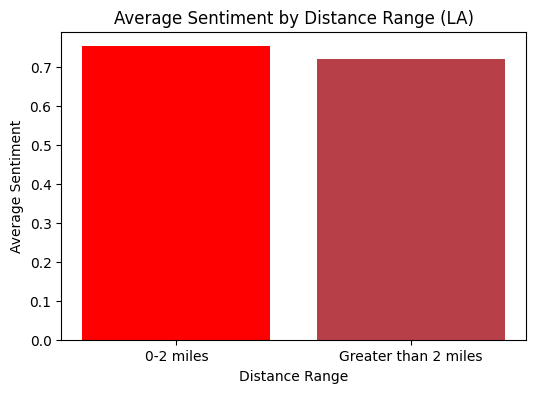

In [ ]:
gradient_palette = sns.color_palette("blend:#FF0000,#708090,#8B0000", n_colors=5)
plt.figure(figsize=(6, 4))
plt.bar(la_sentiments['distance_group'], la_sentiments['compound_score'], color = gradient_palette)
plt.xlabel('Distance Range')
plt.xticks(rotation=0)
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment by Distance Range (LA)')

Text(0.5, 1.0, 'Average Sentiment by Distance Range (TN)')

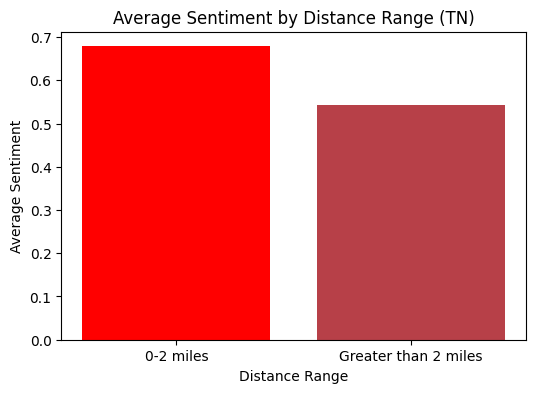

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(tn_sentiments['distance_group'], tn_sentiments['compound_score'], color = gradient_palette)
plt.xlabel('Distance Range')
plt.xticks(rotation=0)
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment by Distance Range (TN)')